# Análisis exploratorio de datos.

# Primera parte.

Se realizará un análisis exploratorio de datos. Al final del Notebook, se escribirá:

- Una lista de preguntas aclaratorias.
- Un plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

## Paso 0. Importar librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns

## Paso 1. Carga de datos.

In [2]:
df_contract = pd.read_csv("final_provider\contract.csv")
df_internet = pd.read_csv("final_provider\internet.csv")
df_personal = pd.read_csv("final_provider\personal.csv")
df_phone = pd.read_csv("final_provider\phone.csv")

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [5]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Los datasets se cargaron satisfactoriamente de los cuales son 4 en total. Cada uno proporciona información única del cliente y los servicios que contrató que vamos a explorar a fondo más adelante.

## Paso 2. Información general de los datos.

In [7]:
print("Información general del dataset:\n")
print(df_contract.info())

print("\nInformación general estadística del dataset:\n")
df_contract.describe(include='all')

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Información general estadística del dataset:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


El primer dataset (`df_contract`) contiene información sobre el contrato del cliente. Su volumen es de 7,043 registros y 8 campos, de los cuales 1 es de tipo `float64` y 7 son de tipo `object`. No hay valores nulos.

Según la información estadística, en la columna `EndDate`, el 73.46 % de los usuarios siguen siendo clientes de la compañía y continúan disfrutando de sus servicios contratados, mientras que el resto decidió dejar de serlo. Otro punto importante es que, de acuerdo con los datos de la columna `MonthlyCharges`, la desviación estándar es de 30.090, con un valor mínimo de 18.25 y un máximo de 118.75. Además, los datos están sesgados a la izquierda, ya que el promedio es menor que la mediana.


In [8]:
print("Información general del dataset:\n")
df_internet.info()

print("\nInformación general estadística del dataset:\n")
df_internet.describe(include='all')

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Información general estadística del dataset:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


El segundo dataset contiene información sobre los servicios de internet contratados por los clientes, como el servicio de teléfono fijo, internet, antivirus, etc. Tiene un volumen de 5,517 registros y 8 columnas, todas de tipo `object`, y no presenta valores nulos.

Los valores parecen ser de tipo booleano, ya que solo representan si el cliente cuenta o no con un servicio específico. La mayoría de los usuarios optan por tener software de antivirus y un plan de soporte técnico, además del servicio de internet. Cabe mencionar que únicamente se dispone de información relevante para 5,517 de los 7,043 usuarios registrados en el dataset de contratos.

In [9]:
print("Información general del dataset:\n")
df_personal.info()

print("\nInformación general estadística del dataset:\n")
df_personal.describe(include='all')

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Información general estadística del dataset:



,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


El tercer dataset proporciona información de datos personales del cliente. Contiene 7,043 registros y 5 columnas. Los tipos de datos incluyen una columna de tipo `int64` y el resto son de tipo `object`. No hay valores nulos, y el número de registros coincide con el del primer dataset.

De acuerdo con la información estadística, la cantidad de hombres y mujeres registrada en este dataset es aproximadamente proporcional, aunque hay ligeramente más hombres que mujeres. Por otro lado, en la columna `SeniorCitizen`, se observa que la mayoría de las personas no pertenecen al grupo de la tercera edad. En cuanto a las columnas `Partner` y `Dependents`, aún no se tiene información relevante sobre el tipo de datos que contienen.

In [10]:
print("Información general del dataset:\n")
df_phone.info()

print("\nInformación general estadística del dataset:\n")
df_phone.describe(include='all')

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Información general estadística del dataset:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


El dataset contiene información sobre los servicios telefónicos; por ejemplo, si el cliente tiene más de una línea de teléfono fijo. Cuenta con 6,361 registros y dos columnas, cuyos tipos de datos son `object`, y no tiene valores nulos.

El método `describe` no proporciona mucha información al respecto, solo que el 53 % de los 6,362 usuarios tiene solo una línea de teléfono fijo.

### Conclusión de este paso.

El análisis preliminar de los datasets proporciona información clave sobre los patrones de comportamiento y las preferencias de los clientes de la compañía.

- **Dataset de contratos**: Este dataset muestra que el 73.46 % de los clientes sigue activo, lo cual refleja una buena tasa de retención. La distribución de los cargos mensuales muestra un sesgo a la izquierda, lo que implica que la mayoría de los clientes opta por planes más costosos, mientras que solo una minoría está en planes económicos. La desviación estándar de 30.090 sugiere una variabilidad considerable en los montos cobrados mensualmente, probablemente debido a distintos niveles de servicio o paquetes contratados.

- **Dataset de servicios de internet**: Los datos indican que la mayoría de los clientes contratan servicios adicionales, como antivirus y soporte técnico, reflejando una preferencia por los servicios de valor añadido. Sin embargo, solo se dispone de información de servicios de internet para 5,517 de los 7,043 clientes en el dataset de contratos, lo cual sugiere que cerca del 21.6 % de los clientes no tienen servicios de internet contratados o que faltan datos en este aspecto.

- **Dataset de datos personales**: La proporción entre hombres y mujeres es casi igual, con una ligera mayoría de hombres. Además, la mayoría de los clientes no pertenece al grupo de la tercera edad, lo cual podría influir en sus preferencias de servicios. Variables como "Partner" y "Dependents" podrían ser relevantes para un análisis más detallado que explore cómo impactan el uso de servicios.

- **Dataset de servicios telefónicos**: Aproximadamente el 53 % de los clientes con servicios telefónicos tiene una sola línea de teléfono fijo, lo que indica una preferencia general por una configuración más sencilla. Sin embargo, una proporción significativa de usuarios cuenta con varias líneas, lo que podría estar relacionado con hogares más grandes o mayores necesidades de comunicación.

En resumen, estos datos sugieren que la mayoría de los clientes prefieren mantener servicios básicos y planes de costos más altos, mientras que un grupo importante contrata servicios adicionales como antivirus o soporte técnico. Además, la mayoría de los clientes no son personas de la tercera edad, lo cual podría influir en la estrategia de marketing y en la personalización de servicios para distintos perfiles de clientes. La compañía podría explorar oportunidades de ventas adicionales para clientes interesados en servicios más completos, a la vez que continúa sus esfuerzos de retención para los clientes de planes de menor costo.

## Paso 3. Visualización de los datos.

Hacer gráficas de:
- Agrupar los usuarios por el tipo de subscipción (`Type`)
- Que usuarios tienen todos los servicios contratados, que tipo de 
  subcripción tienen, y que método de pago implementan. Juntar df_contract y df_internet.
- Hacer un scatter matrix de los 3 primeros dataframes.

In [11]:
# Cmabiar a 'Yes' todo lo que no sea 'No'.
df_contract['EndDate'] = \
    df_contract['EndDate'].where(~(df_contract['EndDate'] != 'No'),
                                 'Yes')

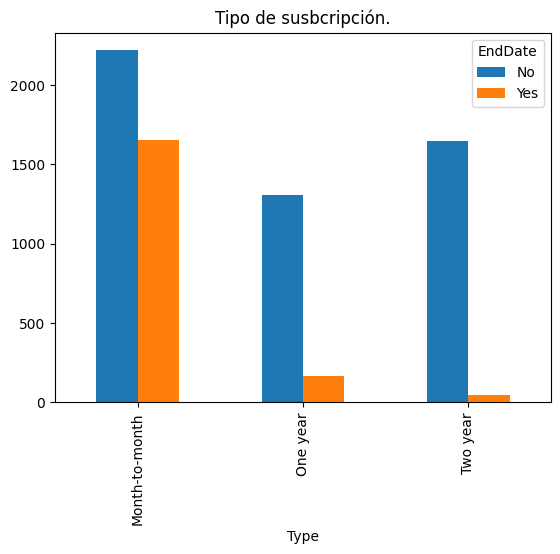

In [12]:
pd.pivot_table(df_contract,
               values = 'customerID',
               index = 'Type',
               columns=['EndDate'],
               aggfunc='count').plot(kind='bar',
                                     title='Tipo de susbcripción.')
plt.show()

De acuerdo con la gráfica los usuarios con suscripción mensual suelen ya no usar los servicios la compañia comparado con los que pagan un año o dos.
Los usuarios con plan mensual suelen canclear los serviicios a comparación con los del plan de un año y dos años

In [13]:
df_contract_internet = pd.merge(df_contract,df_internet,on=['customerID'])
df_contract_internet.head()
#columns = ['InternetService','OnlineSecurity','TechSupport','EndDate']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No


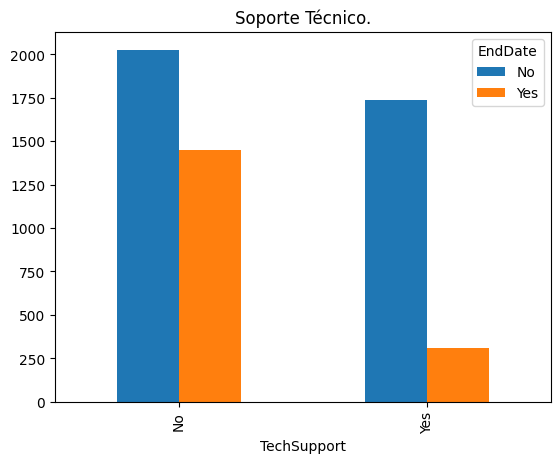

In [14]:
pd.pivot_table(df_contract_internet, values='customerID', index=['TechSupport'], columns=['EndDate'], aggfunc='count').plot(kind='bar',
                                                                                                                            title='Soporte Técnico.')
plt.show()

En al gráfica nos muetras que los usuarios que no tienen plan de soporte técnico son más propensos en irse.

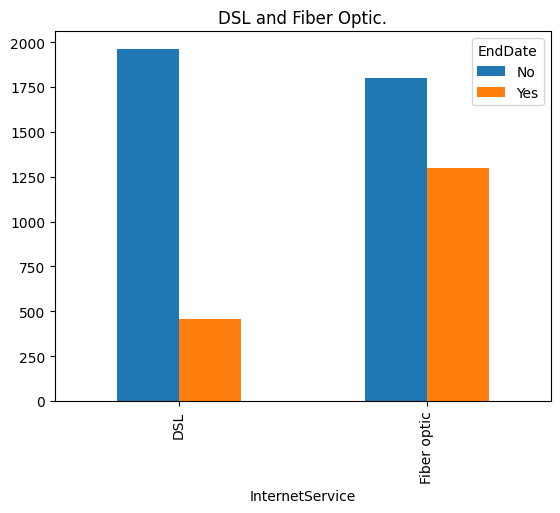

In [15]:
pd.pivot_table(df_contract_internet, values='customerID', index=['InternetService'], columns=['EndDate'], aggfunc='count').plot(kind='bar',
                                                                                                                            title='DSL and Fiber Optic.')
plt.show()

Curioso que los usuarios con fibra óptica tienden a abandonar la compañía.

In [16]:
# cambiar a int64 los valores de las columna TotalCharges
df_contract_internet['TotalCharges'] = df_contract_internet['TotalCharges']\
    .where(~(df_contract_internet['TotalCharges'] == ' '), 0) # Tienen cadenas vacías como valores.


df_contract_internet['TotalCharges'] = df_contract_internet['TotalCharges'].astype('float64')

In [17]:
df_cont_int_per = pd.merge(df_contract_internet,df_personal,on='customerID')
df_cont_int_per_phone = pd.merge(df_cont_int_per,df_phone,on='customerID')

In [18]:
df_cont_int_per_phone.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
1,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
2,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
3,9305-CDSKC,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
4,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,Yes


In [19]:
df_cont_int_per_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   float64
 8   InternetService   4835 non-null   object 
 9   OnlineSecurity    4835 non-null   object 
 10  OnlineBackup      4835 non-null   object 
 11  DeviceProtection  4835 non-null   object 
 12  TechSupport       4835 non-null   object 
 13  StreamingTV       4835 non-null   object 
 14  StreamingMovies   4835 non-null   object 
 15  gender            4835 non-null   object 
 16  SeniorCitizen     4835 non-null   int64  


Las columnas que puedo transformar a valor numérico:
- EndDate, PaperlessBilling, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, gender, Partner, Dependents, MultipleLines

In [20]:
map_y_n = {'Yes':1,'No':0}
columns_to_map = ['EndDate','PaperlessBilling','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Partner','Dependents', 'MultipleLines']
for column in columns_to_map:
    df_cont_int_per_phone[column] = df_cont_int_per_phone[column].map(map_y_n)

In [21]:
df_cont_int_per_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   int64  
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   int64  
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   float64
 8   InternetService   4835 non-null   object 
 9   OnlineSecurity    4835 non-null   int64  
 10  OnlineBackup      4835 non-null   int64  
 11  DeviceProtection  4835 non-null   int64  
 12  TechSupport       4835 non-null   int64  
 13  StreamingTV       4835 non-null   int64  
 14  StreamingMovies   4835 non-null   int64  
 15  gender            4835 non-null   object 
 16  SeniorCitizen     4835 non-null   int64  


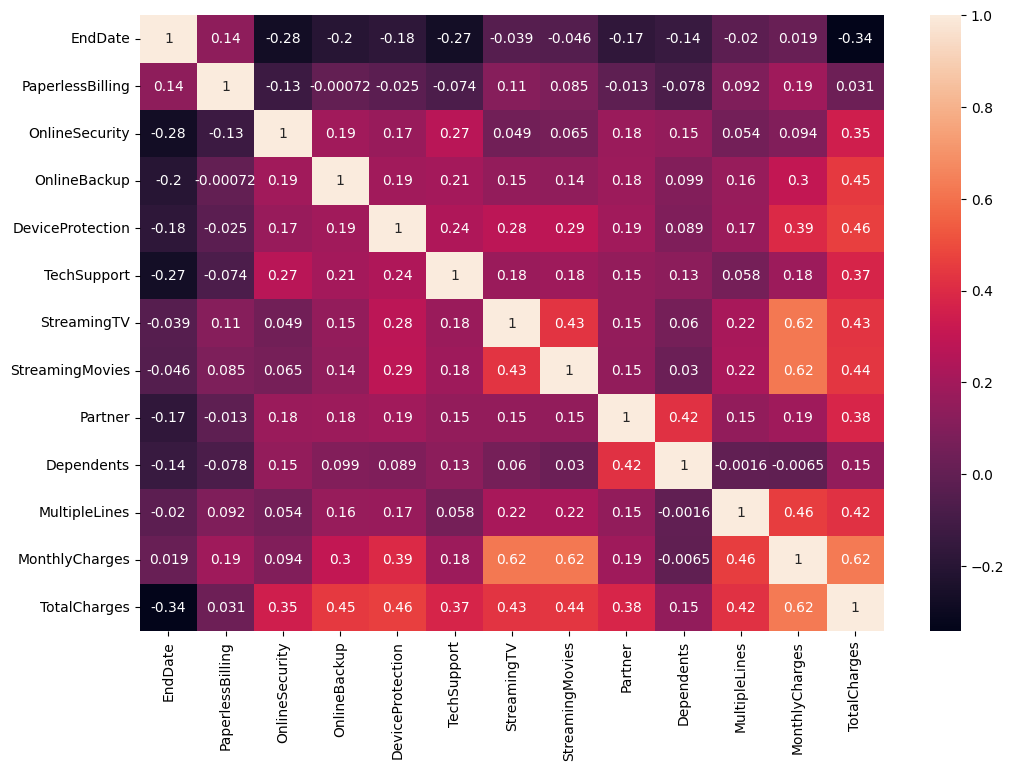

In [22]:
col_corr = ['EndDate','PaperlessBilling','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Partner','Dependents',
                  'MultipleLines','MonthlyCharges','TotalCharges']
plt.figure(figsize=(12,8))
sns.heatmap(df_cont_int_per_phone[col_corr].corr(), annot=True)
plt.show()

En la gráfica de correlación observamos que las columnas que más relación tienen entre otras son `MonthlyCharges` y `StreamingTV`, `StreamingMovies` y `MonthlyCharges`, y `MonthlyCharges` y `TotalCharges` con 0.62 de correlacion.

## Preguntas aclaratorias

- ¿Cómo se calcula el total de cargos?
- ¿Será necesario juntar todos los datasets en uno?
- ¿Qué son las columnas `Partner` y `Dependents`?
- ¿Cómo deberán ser divididos los datos?

## Plan de trabajo

- [ ] **Analizar los datos**: En esta parte se realizará un análisis exploratorio de datos (AED) para comprender cuáles son las características más significativas para la predicción de si el cliente potencialmente abandona la compañía.
- [ ] **Codificar y escalar**: Normalizar de manera correcta los valores de acuerdo a su naturaleza; esto puede incluir codificación One Hot Encoder, Label Encoder, etc. Esto se podrá determinar durante el AED.
- [ ] **Investigar e implementar el mejor modelo de clasificación**: Se proporne implementar al menos 5 modelos y comparar su calidad entre sí. El objetivo es obtener una métrica AUC ROC mayor o igual a 0.85.
